In [1]:
from psess_parser.parser import parse, info, gen_annotation

In [2]:
session_info = info('./data/20250827 Tiana ECoG-L.pssession')

In [3]:
session_info

[{'title': '20250827 Tiana ECoG-L N3 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N3 BOT', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N4 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N4 BOT', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N5 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N5 BOT', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N6 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N6 BOT', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N1 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N1 BOT', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N2 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N2 BOT', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N7 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N7 BOT', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N8 TOP', 'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N8 BOT

In [4]:
def annotate(entry):
    title = entry.get("title")
    parts = title.split(" ")
    date, animal, implant, device_n, loc = parts

    return {
        "device": device_n,
        "block": loc,
    }

annotations = gen_annotation('./data/20250827 Tiana ECoG-L.pssession', annotate)
annotations[:5]

[{'title': '20250827 Tiana ECoG-L N3 TOP',
  'method_id': 'eis',
  'device': 'N3',
  'block': 'TOP'},
 {'title': '20250827 Tiana ECoG-L N3 BOT',
  'method_id': 'eis',
  'device': 'N3',
  'block': 'BOT'},
 {'title': '20250827 Tiana ECoG-L N4 TOP',
  'method_id': 'eis',
  'device': 'N4',
  'block': 'TOP'},
 {'title': '20250827 Tiana ECoG-L N4 BOT',
  'method_id': 'eis',
  'device': 'N4',
  'block': 'BOT'},
 {'title': '20250827 Tiana ECoG-L N5 TOP',
  'method_id': 'eis',
  'device': 'N5',
  'block': 'TOP'}]

In [5]:
opts = {
    "blocks_offset": {"BOT": 16},
    "drop_ch": [],
    "annotations": {
        "channel": {
            "17": "test",
            "24": "test",
            "29": "test"
        }
    }
}

eis, cv, lsv = parse(
    './data/20250827 Tiana ECoG-L.pssession', 
    annotations=annotations, 
    opts=opts
)

In [6]:
print(eis.head())

                          title                       date measurement_id  \
0  20250827 Tiana ECoG-L N3 TOP 2025-08-27 16:49:15.444776       a08f5f23   
1  20250827 Tiana ECoG-L N3 TOP 2025-08-27 16:49:15.444776       a08f5f23   
2  20250827 Tiana ECoG-L N3 TOP 2025-08-27 16:49:15.444776       a08f5f23   
3  20250827 Tiana ECoG-L N3 TOP 2025-08-27 16:49:15.444776       a08f5f23   
4  20250827 Tiana ECoG-L N3 TOP 2025-08-27 16:49:15.444776       a08f5f23   

  method_id device block  channel ch_type  sweep_id  frequency           zre  \
0       eis     N3   TOP        1      ok  ede75d6c   100000.0   4685.335589   
1       eis     N3   TOP        1      ok  ede75d6c    10000.0   6486.528988   
2       eis     N3   TOP        1      ok  ede75d6c     1000.0  15208.046966   
3       eis     N3   TOP        1      ok  ede75d6c      100.0  21145.385474   
4       eis     N3   TOP        1      ok  ede75d6c       10.0  28671.091777   

            zim             z      phase             c  

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import numpy as np

figsize=(12, 7)

In [8]:
df = eis

In [9]:
df = df[df["ch_type"] == "ok"]

In [10]:
top_off = opts.get("blocks_offset", {}).get("TOP", 0)
df[(df['title'] == '20250827 Tiana ECoG-L N1 TOP') & (df['channel'] == top_off + 5)]

,title,date,measurement_id,method_id,device,block,channel,ch_type,sweep_id,frequency,zre,zim,z,phase,c,cre
792,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,eis,N1,TOP,5,ok,ffa61e61,100000.0,8.366861e+03,3.494307e+04,3.593080e+04,76.534465,4.554693e-11,4.307719e-11
793,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,eis,N1,TOP,5,ok,ffa61e61,10000.0,1.733571e+05,3.713401e+05,4.098124e+05,64.974861,4.285961e-11,3.519021e-11
794,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,eis,N1,TOP,5,ok,ffa61e61,1000.0,-1.561479e+06,2.291264e+06,2.772744e+06,124.274141,6.946163e-11,4.743247e-11
795,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,eis,N1,TOP,5,ok,ffa61e61,100.0,1.821942e+07,7.953883e+06,1.987992e+07,23.584197,2.000972e-10,3.203096e-11
796,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,eis,N1,TOP,5,ok,ffa61e61,10.0,-2.126073e+07,2.150945e+08,2.161427e+08,95.644988,7.399304e-11,7.327712e-11
797,20250827 Tiana ECoG-L N1 TOP,2025-08-28 10:50:28.100496,c4c583a9,eis,N1,TOP,5,ok,ffa61e61,1.0,4.505517e+08,3.007131e+09,3.040696e+09,81.478885,5.292585e-11,5.176384e-11


In [11]:
mask = (df['title'] == '20250827 Tiana ECoG-L N1 TOP') & (df['channel'] == top_off + 5)
df_new = df[~mask]
df = df_new

In [12]:
unique_ids = np.unique(df['device'])
cmap = plt.get_cmap("tab20", len(unique_ids)) 
colors = {mid: cmap(i) for i, mid in enumerate(unique_ids)}

legend_handles = [
    Line2D([0], [0], color=col, label=grp)
    for grp, col in colors.items()
]

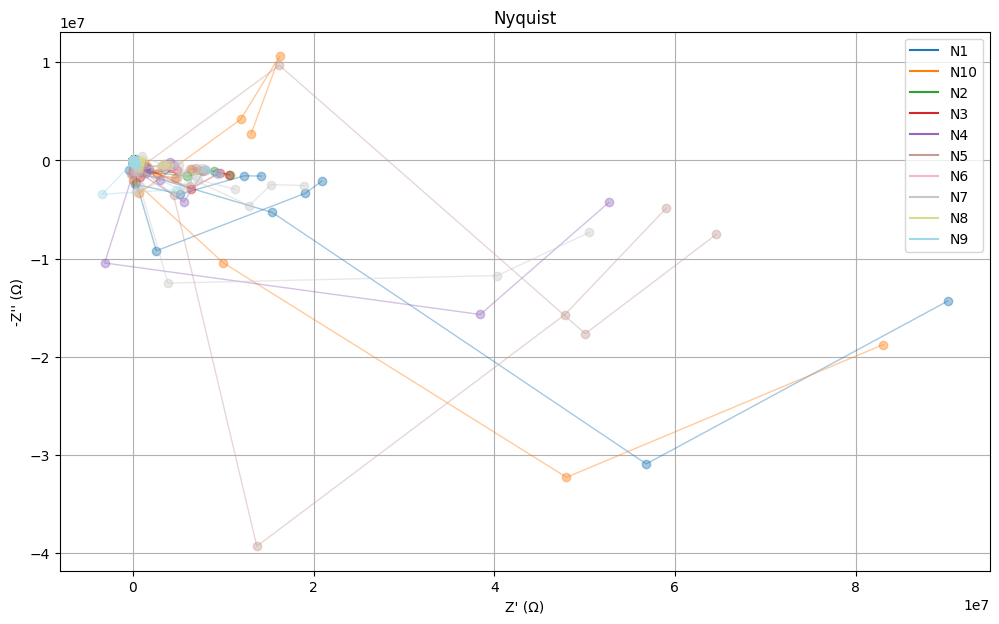

In [13]:
plt.figure(figsize=figsize)
seen = set()
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    mid = g["device"].iloc[0]
    plt.plot(g["zre"], -g["zim"], "o-", color=colors[mid], linewidth=1, alpha=0.4)
    seen.add(mid)

plt.xlabel("Z' (Ω)")
plt.ylabel("-Z'' (Ω)")
plt.title("Nyquist")
plt.legend(handles=legend_handles)
plt.grid(True)

[devN1] channel order:       [8, 12, 23, 26]
[devN1] channel order (1Hz): [12, 8, 23, 26]


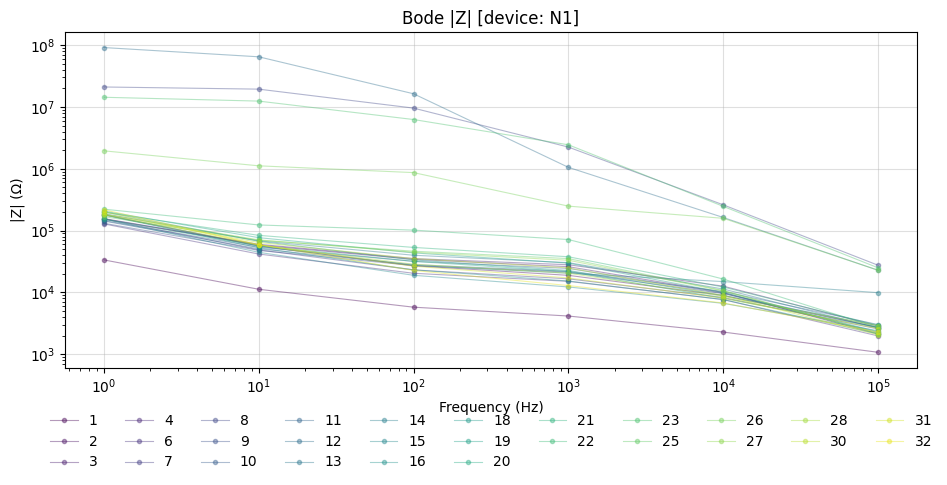

In [14]:
import pandas as pd

def median_rank_channels(df, frequency=None):
    if "z" not in df.columns:
        raise KeyError("column 'z' is required")

    if frequency is not None:
        # restrict to that frequency
        sub = df[df["frequency"] == frequency]
        if sub.empty:
            raise ValueError(f"no rows with frequency={frequency}")
        ranks = sub.groupby("channel")["z"].median().sort_values().reset_index(name="score")
        order = ranks["channel"].tolist()
    else:
        cf = df.groupby(["channel","frequency"], as_index=False)["z"].median()
        cf["rank"] = cf.groupby("frequency")["z"].rank(method="average", ascending=True)
        ranks = (cf.groupby("channel")["rank"]
                   .median()
                   .sort_values()
                   .reset_index(name="score"))
        order = ranks["channel"].tolist()

    return order, ranks


def plot_device(data_df, device, figsize=figsize):
    df_nX = data_df[data_df['device'].isin([device])]
    
    order, ranks = median_rank_channels(df_nX)
    print(f"[dev{device}] channel order:      ", order[::-1][:4])
    order, ranks = median_rank_channels(df_nX, frequency=1)
    print(f"[dev{device}] channel order (1Hz):", order[::-1][:4])

    unique_ids_nX = np.unique(df_nX['channel'])
    cmap = plt.get_cmap("viridis")
    colors_nX = {mid: cmap(i / len(unique_ids_nX)) for i, mid in enumerate(unique_ids_nX)}

    plt.figure(figsize=figsize)
    for sid, g in df_nX.groupby(["device", "channel", "sweep_id"]):
        g = g.sort_values("frequency", ascending=False)
        mag = g["z"].to_numpy() if "z" in g.columns else np.hypot(g["zre"], g["zim"])
        plt.loglog(g["frequency"], mag, ".-", color=colors_nX[g["channel"].iloc[0]], linewidth=0.8, alpha=0.4, label=sid[1])

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("|Z| (Ω)")
    plt.title(f"Bode |Z| [device: {device}]")
    plt.grid(True, alpha=0.4)

    plt.legend(
        bbox_to_anchor=(0.5, -0.1),
        loc="upper center",
        ncol=11,
        frameon=False
    )
    plt.tight_layout()
    
plot_device(df, "N1", figsize=(10, 5))

[devN2] channel order:       [23, 9, 4, 7]
[devN2] channel order (1Hz): [23, 9, 4, 7]
[devN3] channel order:       [8, 22, 4, 26]
[devN3] channel order (1Hz): [8, 22, 4, 2]
[devN4] channel order:       [28, 4, 12, 20]
[devN4] channel order (1Hz): [28, 4, 12, 20]
[devN5] channel order:       [13, 12, 4, 5]
[devN5] channel order (1Hz): [12, 13, 4, 5]
[devN6] channel order:       [20, 27, 2, 18]
[devN6] channel order (1Hz): [20, 2, 27, 18]
[devN7] channel order:       [1, 8, 9, 22]
[devN7] channel order (1Hz): [1, 8, 9, 22]
[devN8] channel order:       [3, 5, 32, 15]
[devN8] channel order (1Hz): [3, 5, 32, 14]
[devN9] channel order:       [23, 12, 16, 2]
[devN9] channel order (1Hz): [23, 2, 16, 12]


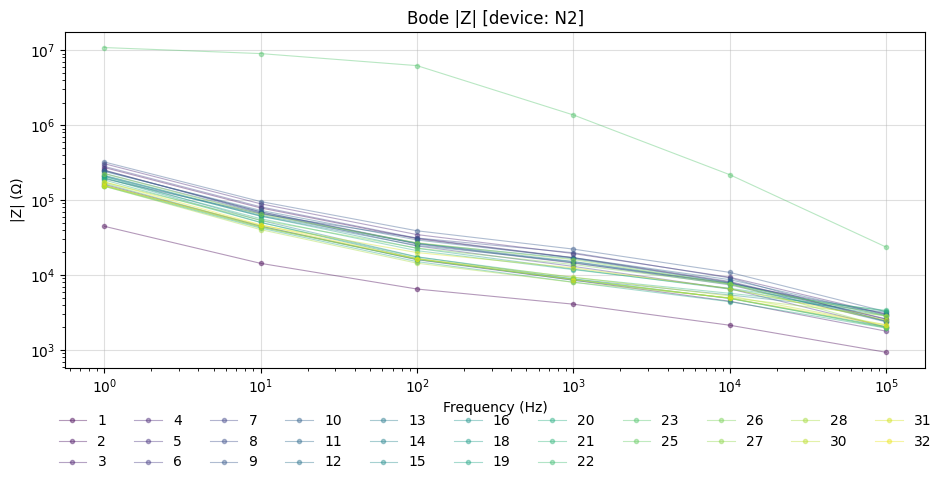

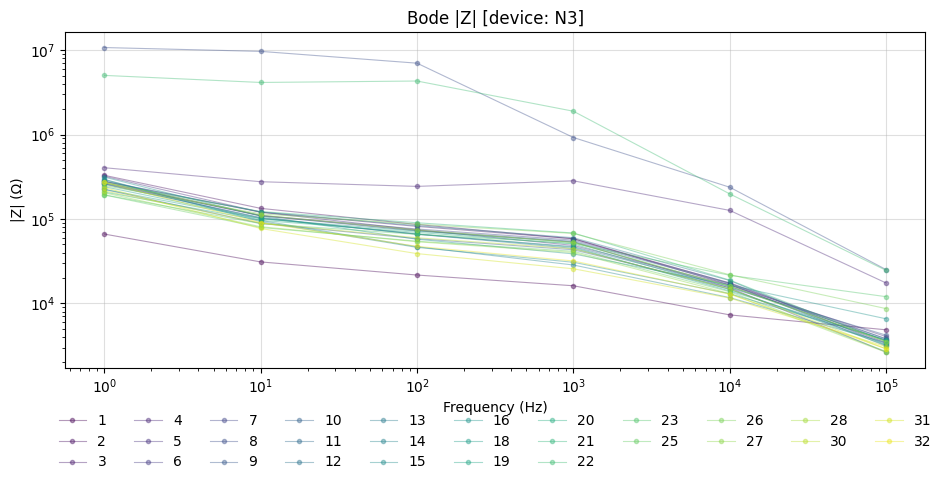

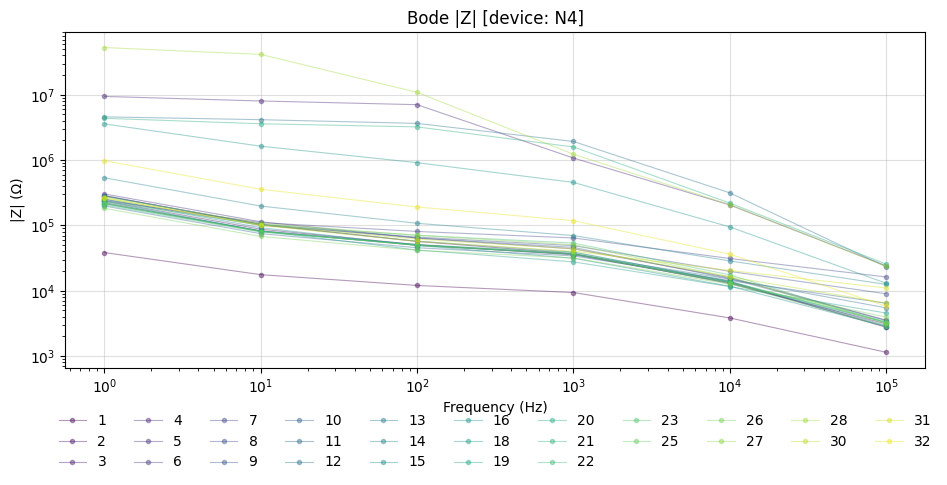

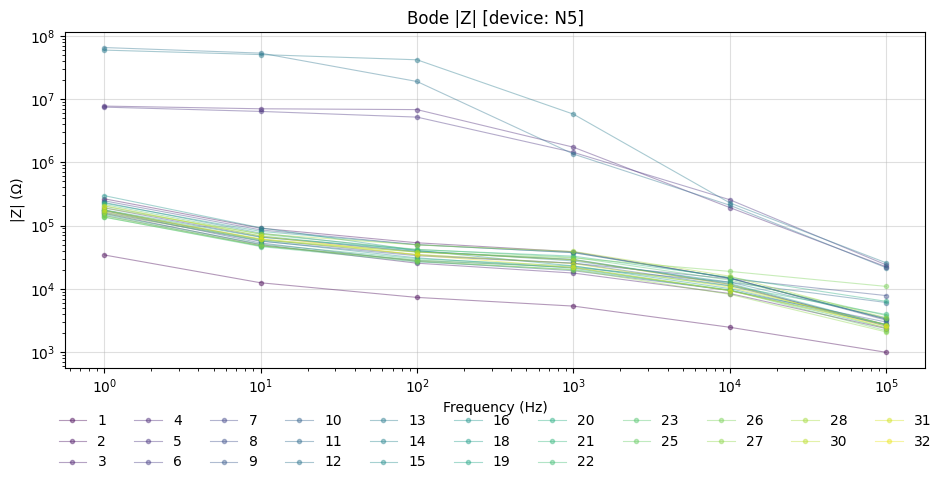

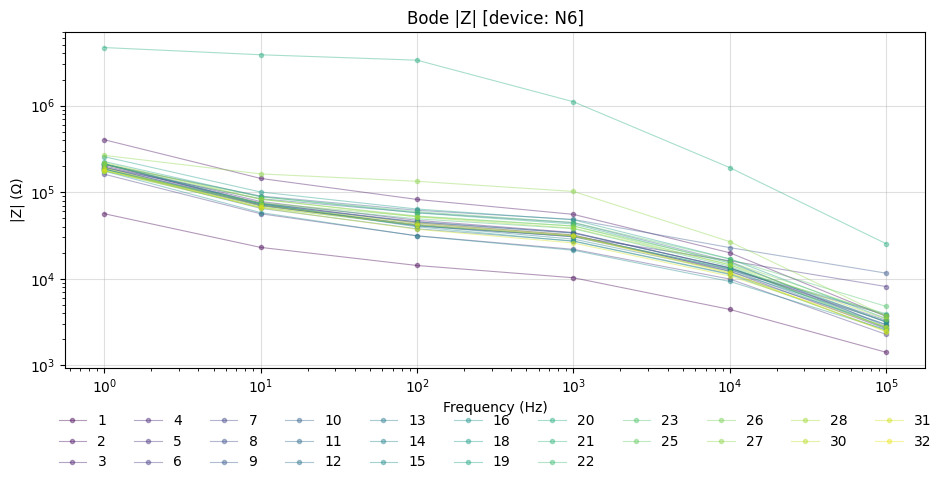

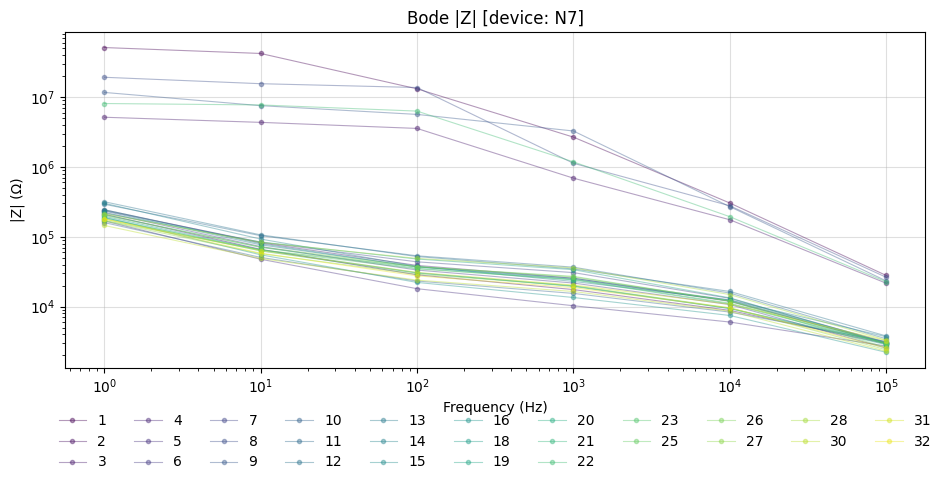

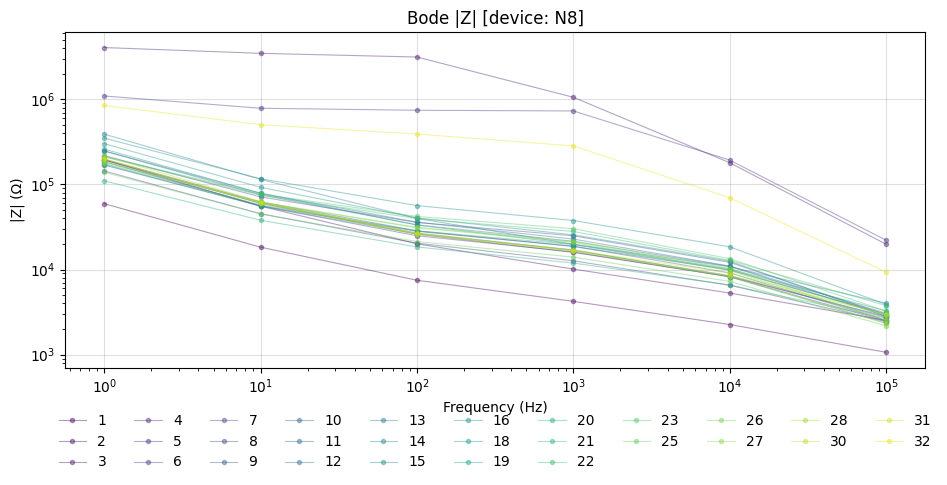

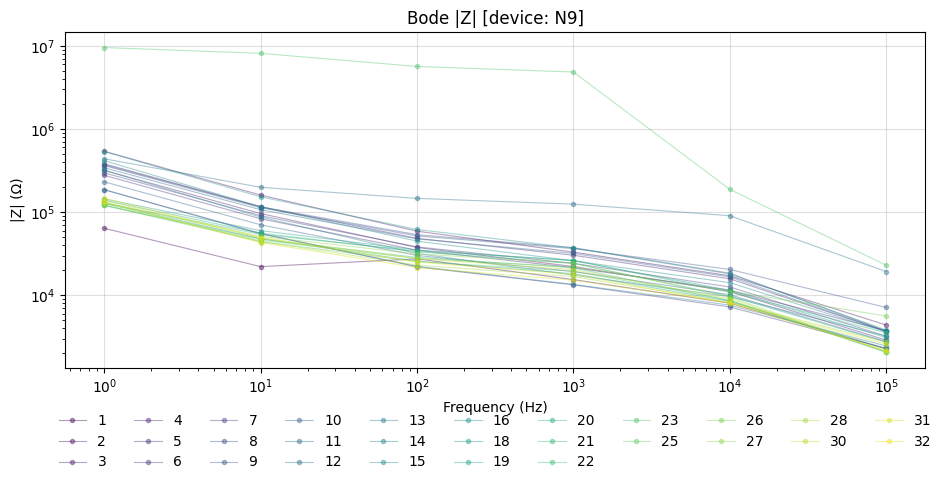

In [15]:
plot_device(df, "N2", figsize=(10, 5))
plot_device(df, "N3", figsize=(10, 5))
plot_device(df, "N4", figsize=(10, 5))
plot_device(df, "N5", figsize=(10, 5))
plot_device(df, "N6", figsize=(10, 5))
plot_device(df, "N7", figsize=(10, 5))
plot_device(df, "N8", figsize=(10, 5))
plot_device(df, "N9", figsize=(10, 5))

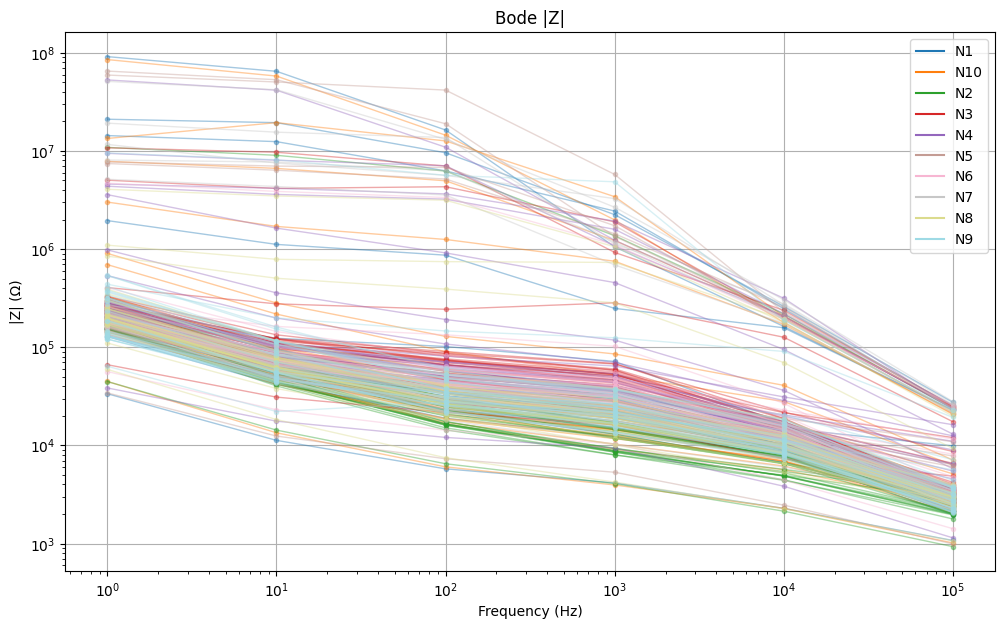

In [16]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    mag = g["z"].to_numpy() if "z" in g.columns else np.hypot(g["zre"], g["zim"])
    mid = g["device"].iloc[0]
    plt.loglog(g["frequency"], mag, ".-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z| (Ω)")
plt.title("Bode |Z|")
plt.legend(handles=legend_handles)
plt.grid(True)

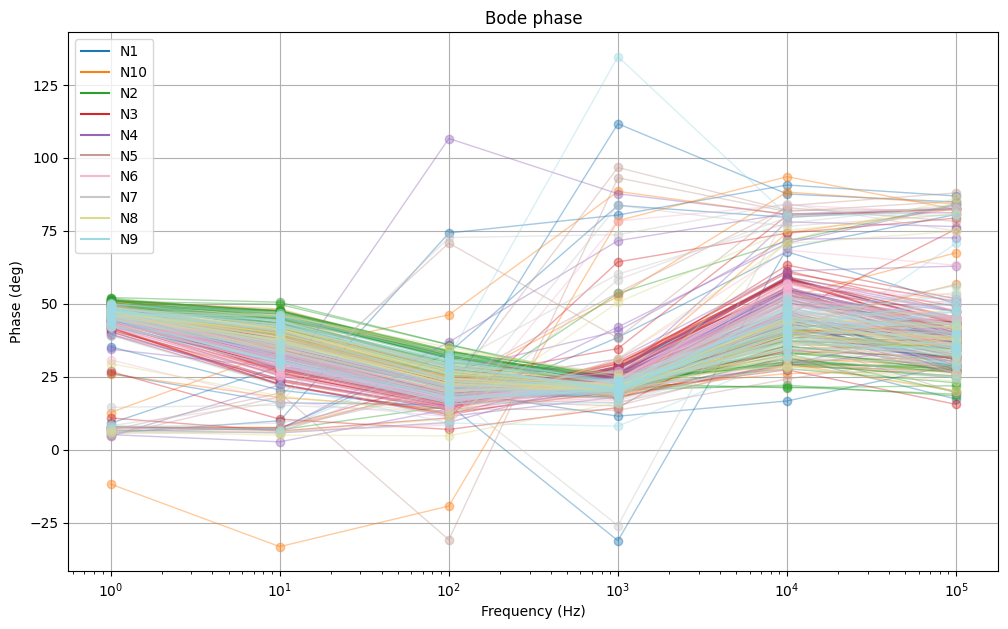

In [17]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    phase = g["phase"].to_numpy() if "phase" in g.columns else np.degrees(np.arctan2(g["zim"], g["zre"]))
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], phase, "o-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (deg)")
plt.title("Bode phase")
plt.grid(True)
plt.legend(handles=legend_handles)
plt.show()

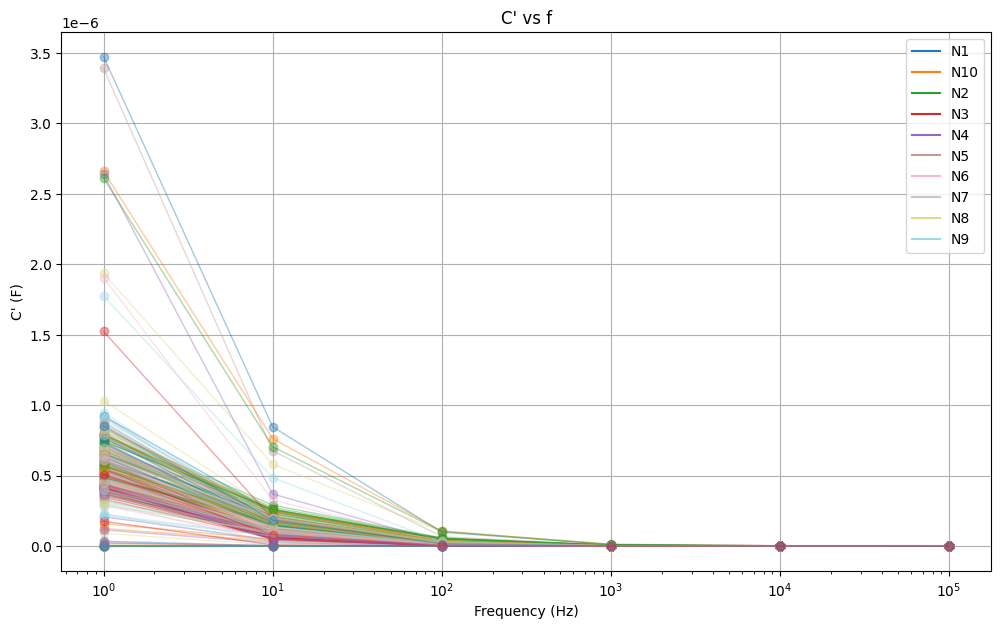

In [18]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["sweep_id", "channel"]):
    g = g.sort_values("frequency", ascending=False)
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], g["cre"], "o-", color=colors[mid], linewidth=1, alpha=0.4)
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("C' (F)"); plt.title("C' vs f")
plt.legend(handles=legend_handles)
plt.grid(True)

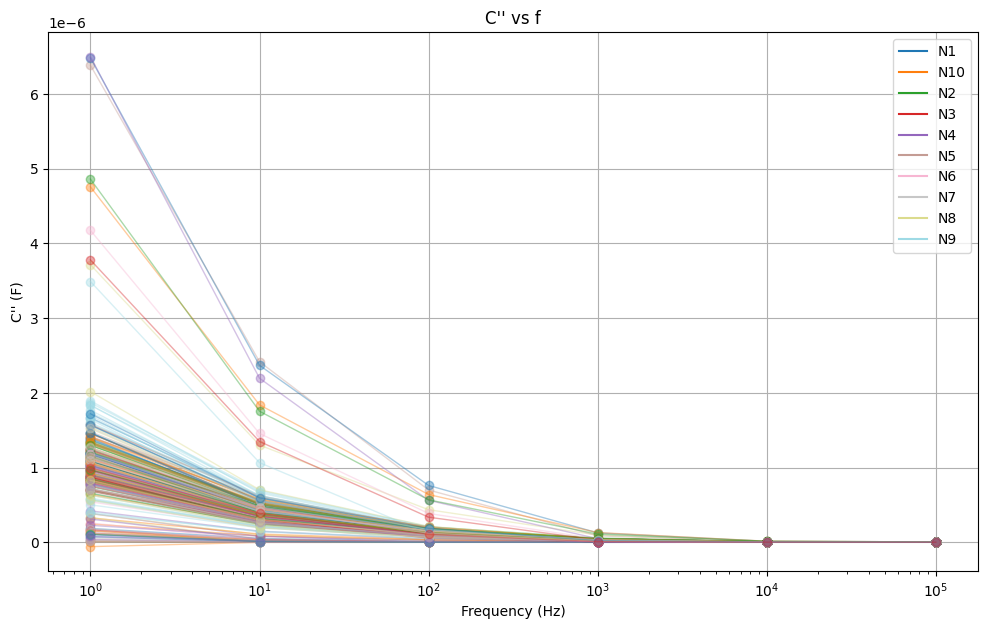

In [19]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["sweep_id", "channel"]):
    g = g.sort_values("frequency", ascending=False)
    c_plot = g["c"]          # or: -g["c"]
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], c_plot, "o-", color=colors[mid], linewidth=1, alpha=0.4)
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("C'' (F)"); plt.title("C'' vs f")
plt.legend(handles=legend_handles)
plt.grid(True)

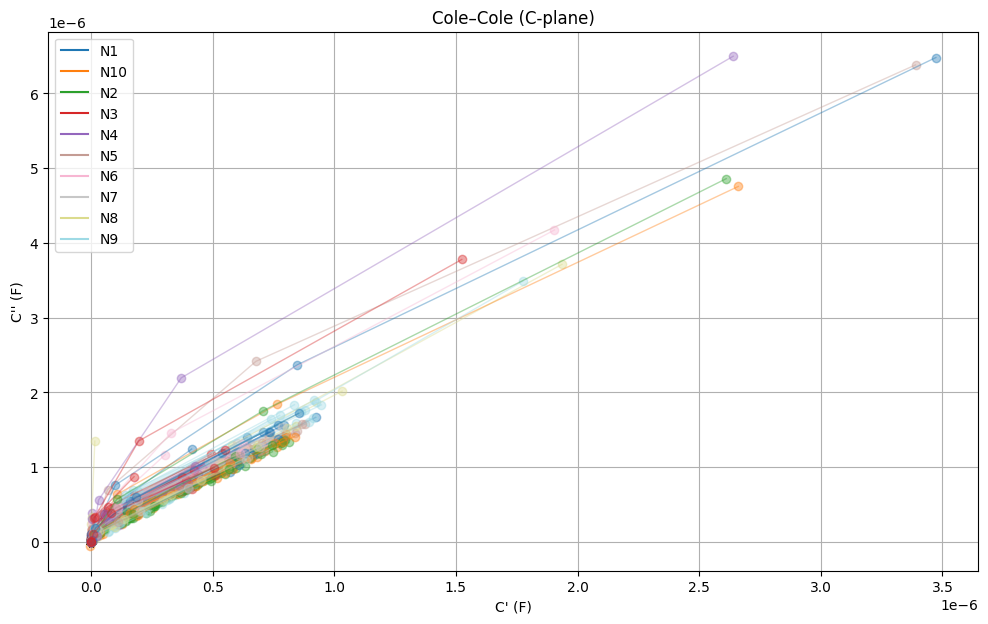

In [20]:
plt.figure(figsize=figsize)

for sid, g in df.groupby(["sweep_id", "channel"]):
    mid = g["device"].iloc[0]
    plt.plot(g["cre"], g["c"], "o-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("C' (F)")
plt.ylabel("C'' (F)")
plt.title("Cole–Cole (C-plane)")
plt.legend(handles=legend_handles)
plt.grid(True)

In [21]:
base = df.groupby(["device","channel","frequency"], as_index=False)["z"].mean()

summary = (base.groupby(["channel","frequency"])["z"]
               .agg(["mean","std","var","min","max"])
               .reset_index())

In [22]:
v = (base
     .groupby(["channel","frequency"])["z"]
     .var(ddof=1)               # variance across devices
     .reset_index(name="var_z"))


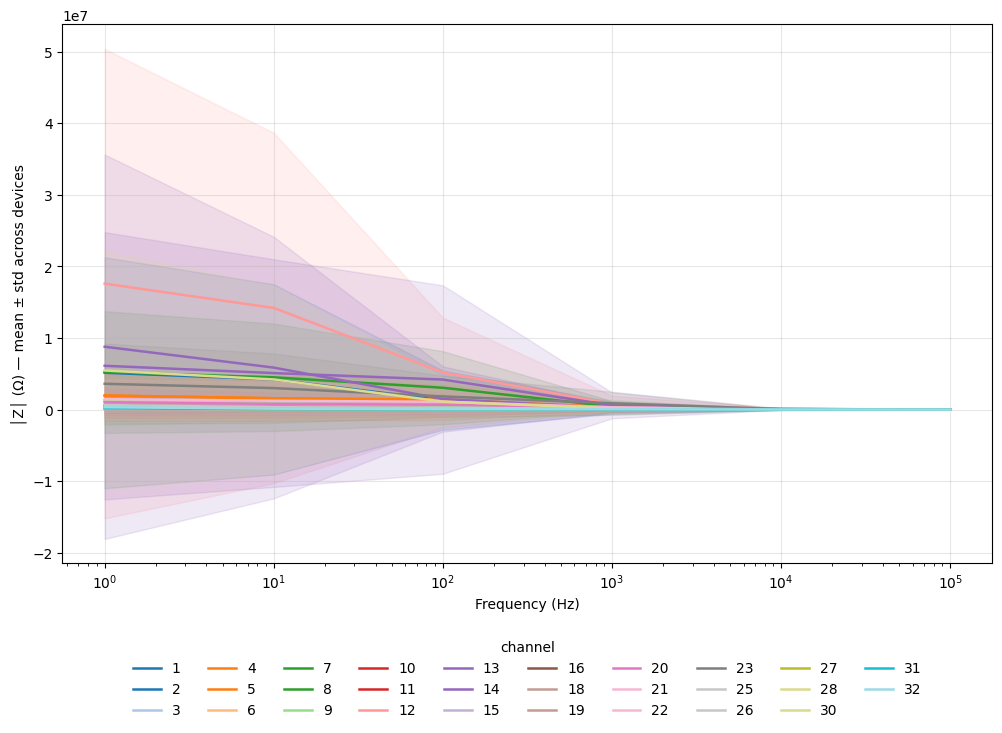

In [23]:
channels = summary["channel"].unique()
cmap = plt.get_cmap("tab20")
colors = {c: cmap(i/len(channels)) for i,c in enumerate(channels)}

plt.figure(figsize=figsize)
for c in channels:
    s = summary[summary["channel"]==c].sort_values("frequency")
    f = s["frequency"].to_numpy()
    m = s["mean"].to_numpy()
    sdev = s["std"].to_numpy()
    plt.semilogx(f, m, lw=1.8, color=colors[c], label=str(c))
    plt.fill_between(f, m - sdev, m + sdev, alpha=0.15, color=colors[c])

    plt.xlabel("Frequency (Hz)")
plt.ylabel("│Z│ (Ω) — mean ± std across devices")
plt.grid(True, alpha=0.3)

plt.legend(title="channel", bbox_to_anchor=(0.5,-0.12), loc="upper center",
           ncol=min(10, len(channels)), frameon=False)


In [26]:
summary_dev = (base[base['device'].isin(['N6', 'N8', 'N9'])]
               .groupby(["device","frequency"])["z"]
               .agg(mean="mean", std="std", n="count")
               .reset_index())

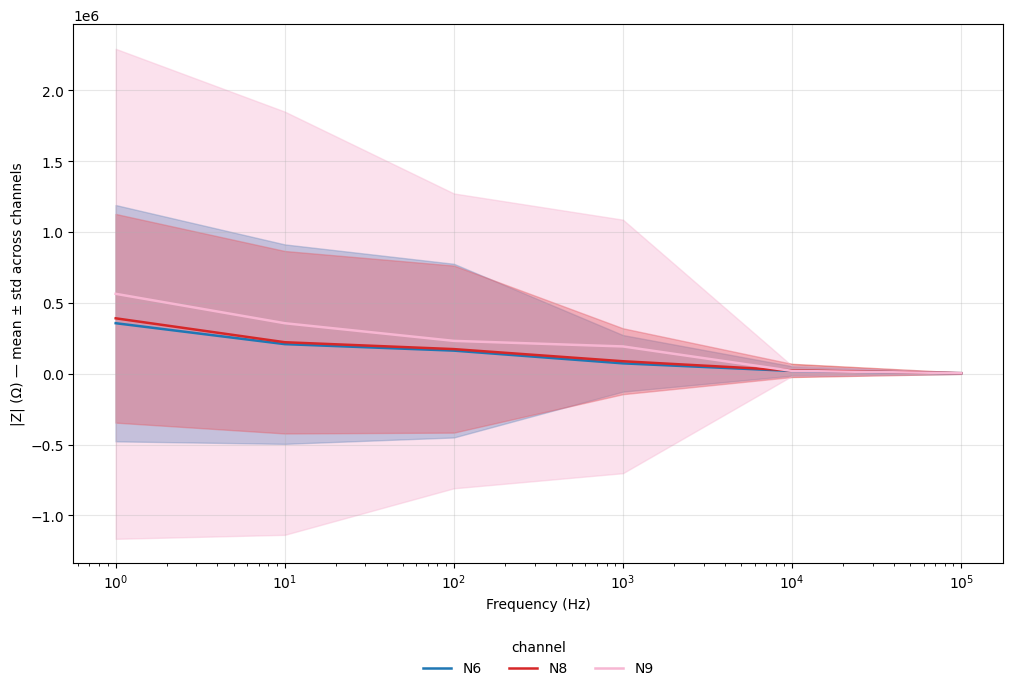

In [27]:
devices = summary_dev["device"].unique()
cmap = plt.get_cmap("tab20")
colors = {d: cmap(i/len(devices)) for i,d in enumerate(devices)}

plt.figure(figsize=figsize)
for d in devices:
    s = summary_dev[summary_dev["device"]==d].sort_values("frequency")
    f = s["frequency"].to_numpy()
    m = s["mean"].to_numpy()
    sdev = s["std"].to_numpy()
    plt.semilogx(f, m, lw=1.8, color=colors[d], label=str(d))
    plt.fill_between(f, m - sdev, m + sdev, alpha=0.4, color=colors[d])
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z| (Ω) — mean ± std across channels")
plt.grid(True, alpha=0.3)

plt.legend(title="channel", bbox_to_anchor=(0.5,-0.12), loc="upper center",
           ncol=min(10, len(channels)), frameon=False)